## Домашнее задание 3 (10 баллов)

### О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn.

Вы будет работать с задачей кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно будет подготовить, исследовать (в том числе с помощью средств визуализации) и даже попробовать предложить какую-нибудь формулу для условной оценки надёжности клиентов исходя из предоставленных данных. Описание данных:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.
Также по каждому графику ожидается небольшой комментарий с выводами.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [1]:
import pandas as pd

### Задание 1 (0.0 балла)

Прочитайте средствами pandas файл с данными по ссылке https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv. Выведите базовое представление таблицы (первые 5 и последние 5 строк, размер).

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv')
data.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good


In [3]:
data.tail()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,...,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,...,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
999,no checking account,30,no credits taken/all credits paid back duly,car (used),6350,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,car or other,31,none,rent,1,skilled employee/official,0 to 2,no,no,bad


In [4]:
data.shape

(1000, 21)

### Задание 2 (0.5 балла)

Определите, есть ли пропуски в данных. Разделите признаки на количественные, бинарные, порядковые и категориальные.

In [5]:
a = str(data.isnull().sum().sum())
print('Пропущенных значений в таблице: ' + a)


Пропущенных значений в таблице: 0


In [6]:
d = {}
for i in data.columns.tolist():
    d[i] = data[i].unique()
d

{'status': array(['no checking account', '... < 0 DM',
        '... >= 200 DM / salary for at least 1 year', '0<= ... < 200 DM'],
       dtype=object),
 'duration': array([18,  9, 12, 10,  8,  6, 24, 11, 30, 48, 36, 15, 42, 21, 27, 33, 28,
         4, 47, 14, 39, 60,  5, 22, 54, 13, 16,  7, 20, 26, 45, 72, 40],
       dtype=int64),
 'credit_history': array(['all credits at this bank paid back duly',
        'no credits taken/all credits paid back duly',
        'existing credits paid back duly till now',
        'delay in paying off in the past',
        'critical account/other credits elsewhere'], dtype=object),
 'purpose': array(['car (used)', 'others', 'retraining', 'furniture/equipment',
        'car (new)', 'business', 'domestic appliances', 'radio/television',
        'repairs', 'vacation'], dtype=object),
 'amount': array([ 1049,  2799,   841,  2122,  2171,  2241,  3398,  1361,  1098,
         3758,  3905,  6187,  1957,  7582,  1936,  2647,  3939,  3213,
         2337,  7228,  3

**Количественные признаки:** duration, amount, age

**Бинарные признаки:** telephone, foreign_worker, credit_risk

**Порядковые признаки:** status, savings, employment_duration, installment_rate, present_residence, number_credits, people_liable

**Категориальные признаки:** credit_history, purpose, personal_status_sex, other_debtors, property, other_installment_plans, housing, job

### Задание 3 (0.5 балла)

Выведите среднюю сумму кредита (колонка amount) в каждой категории (колонка purpose), воспользовавшись методом groupby.

In [7]:
data.groupby('purpose')['amount'].mean()

purpose
business               8209.333333
car (new)              5370.223301
car (used)             3066.983425
domestic appliances    2728.090909
furniture/equipment    2487.685714
others                 3062.948718
radio/television       1498.000000
repairs                3180.400000
retraining             4158.041237
vacation               1205.888889
Name: amount, dtype: float64

### Задание 4 (0.5 балла)


Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)? А какой процент клиентов старше 40 лет снимает жилье?

In [8]:
under_30 = data[data['age'] < 30]
older_40 = data[data['age'] > 40]
under_30_percent = len(under_30[under_30['housing'] == 'rent']) * 100 / len(under_30)
older_40_percent = len(older_40[older_40['housing'] == 'rent']) * 100 / len(older_40)
print(str(round(under_30_percent, 2)) + '% клиентов моложе 30 лет снимает жилье.')
print(str(round(older_40_percent, 2)) + '% клиентов старше 40 лет снимает жилье.')

66.67% клиентов моложе 30 лет снимает жилье.
68.01% клиентов старше 40 лет снимает жилье.


### Задание 5 (0.5 балла)

 У скольких иностранцев (foreign_worker) число кредитов (number_credits) больше 3?

In [9]:
data['number_credits'].unique()

array(['1', '2-3', '4-5', '>= 6'], dtype=object)

In [10]:
foreigners = data[data['foreign_worker'] == 'yes']
foreigners_more_than_3 = len(foreigners[(foreigners['number_credits'] == '4-5') | (foreigners['number_credits'] == '>= 6')])
print('У ' + str(foreigners_more_than_3) + ' иностранца(-ев) число кредитов больше 3.')

У 1 иностранца(-ев) число кредитов больше 3.


### Задание 6 (1 балл)

In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Используя numpy и matplotlib, начнём с тренировки: постройте график функций $sin(x)$ и $cos(x)$ от $-\pi$ до $\pi$ из 100 точек c легендой и сеткой. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

Text(0.5, 1.0, 'Функции sin(x) и cos(x)')

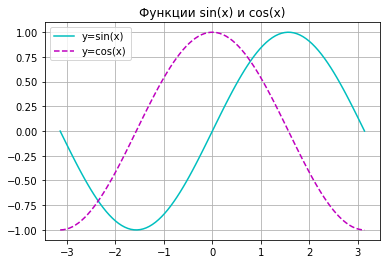

In [12]:
x = np.linspace(-np.pi, np.pi, num=100)

plt.plot(x, np.sin(x), color='c', label='y=sin(x)')
plt.plot(x, np.cos(x), color='m', linestyle='dashed', label='y=cos(x)')
plt.legend()
plt.grid()
plt.title('Функции sin(x) и cos(x)')

In [13]:
# your code here

### Задание 7 (1 балл)

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Постройте зеркальные горизонтальные гистограммы.

C:\Users\halif\AppData\Local\Temp/ipykernel_13900/1481935290.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_yticklabels(data['status'].unique())
C:\Users\halif\AppData\Local\Temp/ipykernel_13900/1481935290.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_yticklabels(data['status'].unique())


Text(0.5, 1.2, 'Status of checking account')

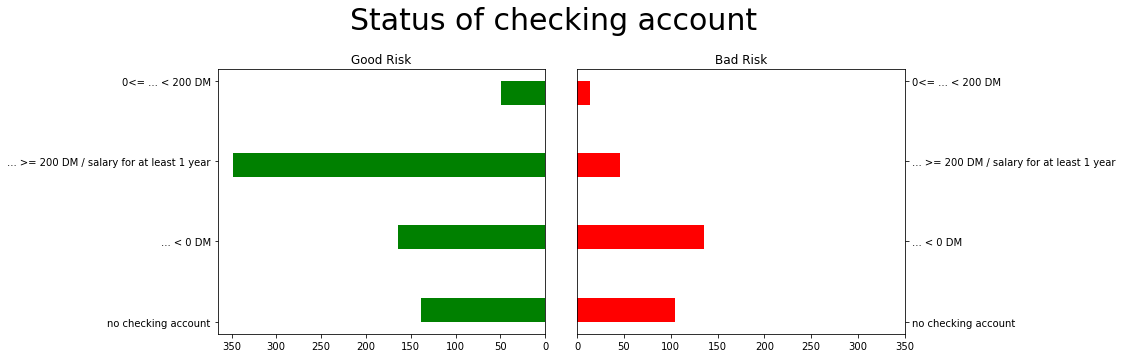

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(10,4))
fig.tight_layout(pad=0.1)
good = data[data['credit_risk'] == 'good']
bad = data[data['credit_risk'] == 'bad']

hist_1 = good['status'].hist(color='g',ax=ax[0], orientation='horizontal').grid(False)
hist_2 = bad['status'].hist(color='r', ax=ax[1], orientation='horizontal').grid(False)

ax[0].invert_xaxis()
ax[1].yaxis.tick_right()
ax[0].title.set_text('Good Risk')
ax[1].title.set_text('Bad Risk')
ax[0].set_yticklabels(data['status'].unique())
ax[1].set_yticklabels(data['status'].unique())
plt.xlim([0,350])
fig.suptitle('Status of checking account', fontsize=30, y=1.2)

## Вывод: 
На графиках видно, что наибольшее число надежных клиентов обладают счетами с зарплатой от одного года, а наибольшее число ненадежных - счатами от 0 до 200 DM. 

### Задание 8  (0.5 балла)

In [16]:
import seaborn as sns

Теперь постройте гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

Text(0.5, 1.0, 'Количество положительных и отрицательных кейсов в зависимости от размера сберегательного счёта')

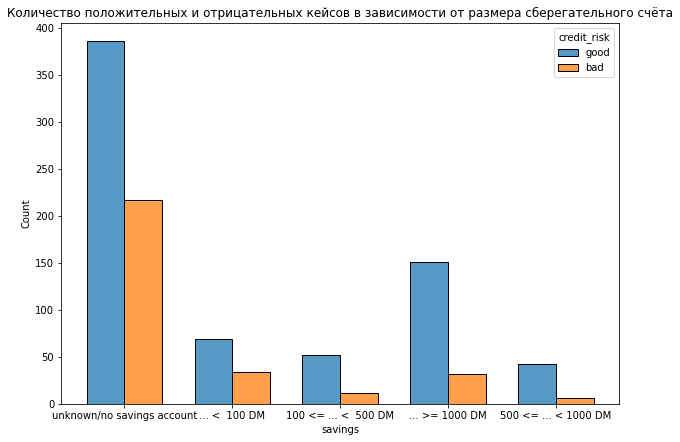

In [28]:
plt.figure(figsize=(10,7))
sns.histplot(data=data, x='savings', hue='credit_risk', multiple='dodge', shrink=0.7)
plt.title("Количество положительных и отрицательных кейсов в зависимости от размера сберегательного счёта")

## Вывод:
Наибольшее число клиентов как с хорошим, так и плохим статусом риска, не имеют никаких накоплений.

### Задание 9  (1 балл)

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например. Постройте подходящую для этого визуализацию.

Text(0.5, 1.0, 'Распределение по возрасту количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта')

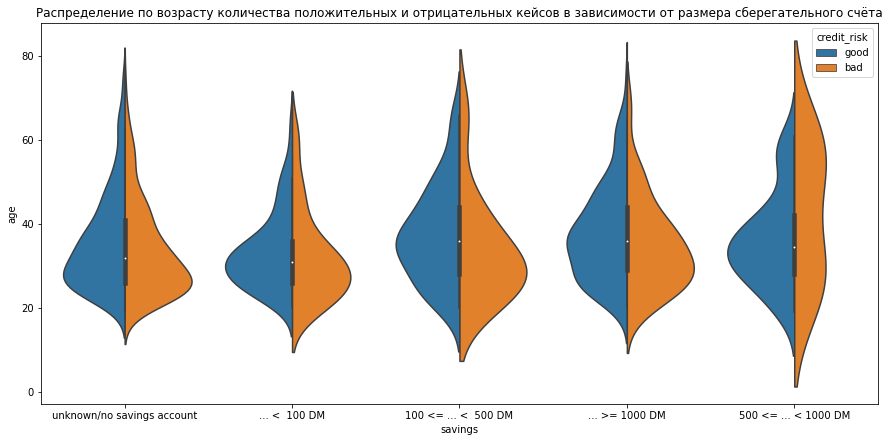

In [29]:
plt.figure(figsize=(15,7))
sns.violinplot(data=data, x='savings', y='age', hue='credit_risk', split=True)
plt.title('Распределение по возрасту количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта')

## Вывод:
Наибольшее число как отрицательных, так и положительных кейсов для всех размеров сберегательного счета приходится на клиентов в возрасте от 20 до 40 лет.

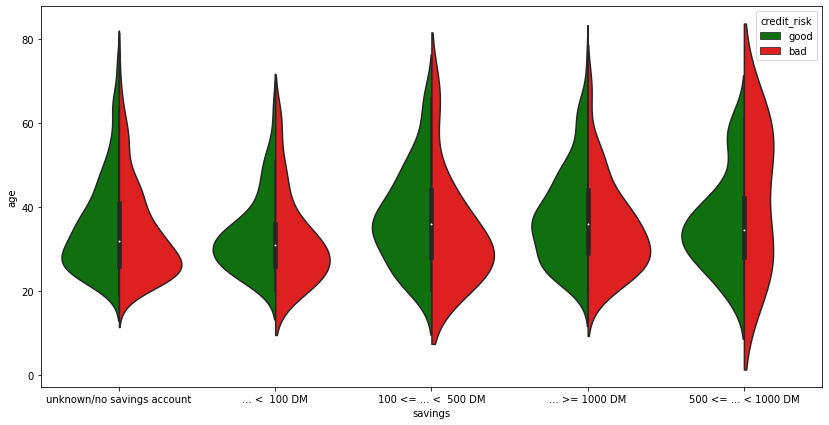

In [12]:
# your code here

### Задание 10  (0.5 балла)

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

C:\Users\halif\AppData\Local\Temp/ipykernel_13900/1856349030.py:11: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend([hist_1, hist_2, hist_3], labels=labels, loc='upper center', bbox_to_anchor=(0.8, 0.9))


Text(0.5, 0.93, 'Распределение положительных, отрицательных и всех взятых кейсов по возрастам')

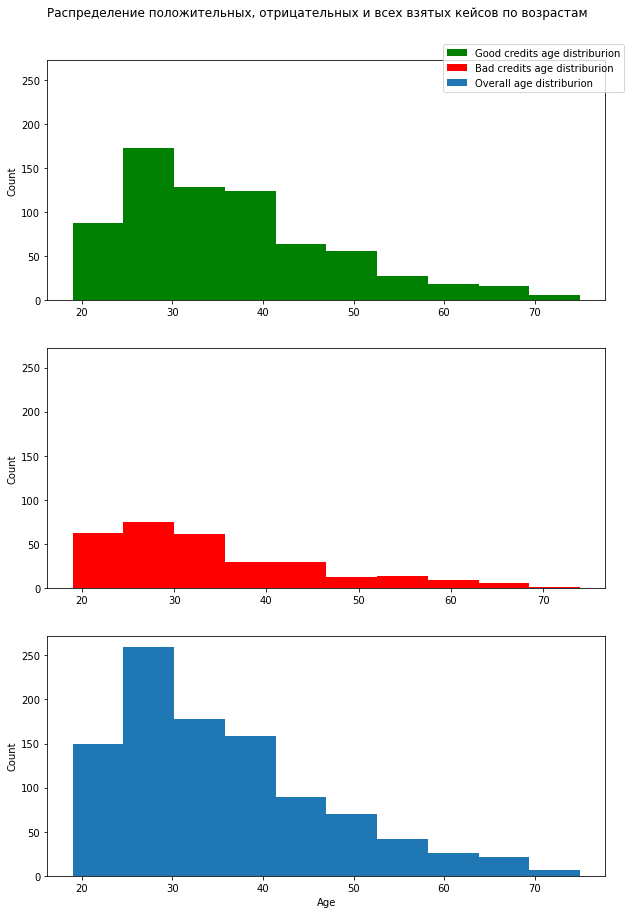

In [39]:
fig, ax = plt.subplots(3, figsize=(10,15), sharey=True)

good = data[data['credit_risk'] == 'good']
bad = data[data['credit_risk'] == 'bad']

hist_1 = good['age'].hist(color='g',ax=ax[0]).grid(False)
hist_2 = bad['age'].hist(color='r', ax=ax[1]).grid(False)
hist_3 = data['age'].hist(ax=ax[2]).grid(False)

labels = ['Good credits age distriburion', 'Bad credits age distriburion', 'Overall age distriburion']
fig.legend([hist_1, hist_2, hist_3], labels=labels, loc='upper center', bbox_to_anchor=(0.8, 0.9))

ax[0].set_ylabel('Count')
ax[1].set_ylabel('Count')
ax[2].set_ylabel('Count')
ax[2].set_xlabel('Age')
fig.suptitle('Распределение положительных, отрицательных и всех взятых кейсов по возрастам', y=0.93)

## Вывод:
Распределение положительных и отрицательных кейсов по возрастам, а также распределение всех взятых кредитов имеют схожую форму.

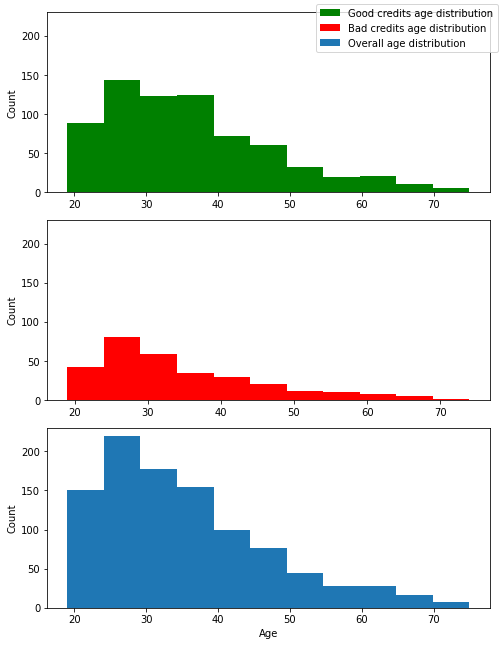

In [13]:
# your code here

### Задание 11  (0.5 балла)

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

Text(0.5, 1.0, 'Взаимосвязь между продолжительностью и размерами кредитов')

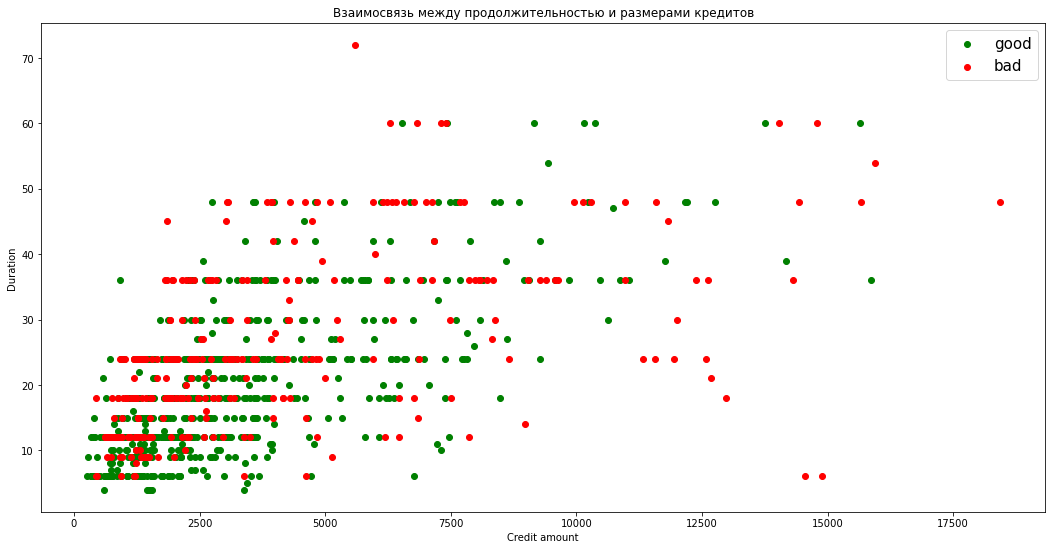

In [40]:
good = data[data['credit_risk'] == 'good']
bad = data[data['credit_risk'] == 'bad']

plt.figure(figsize=(18,9))
plt.scatter(good['amount'], good['duration'], color='g', label='good')
plt.scatter(bad['amount'], bad['duration'], color='r', label='bad')
plt.ylabel('Duration')
plt.xlabel('Credit amount')
plt.legend(fontsize=15)
plt.title('Взаимосвязь между продолжительностью и размерами кредитов')

## Вывод:
Взаимосвязь между продолжительностью и суммой кредита скорее положительная.

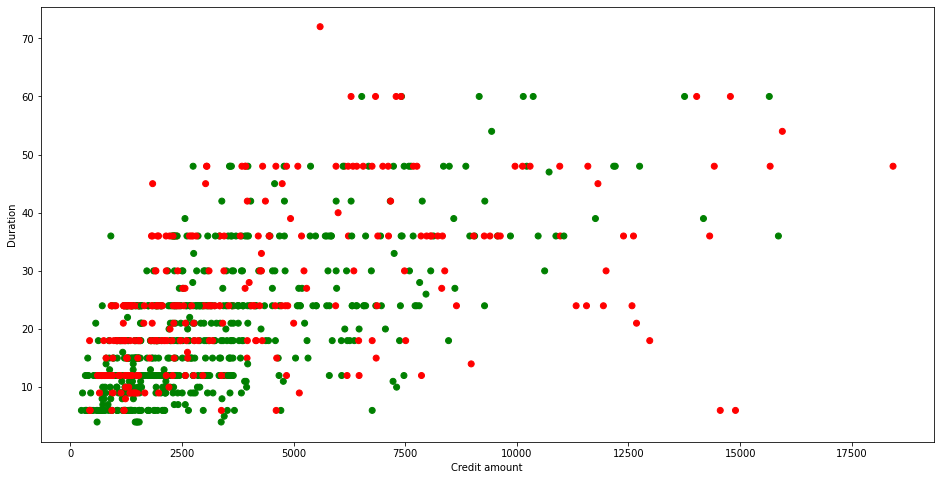

In [21]:
# your code here

### Задание 12  (1 балл)

Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

Text(0.5, 0.92, 'Взаимосвязь между продолжительностью кредитов, их размерами и возрастом клиентов')

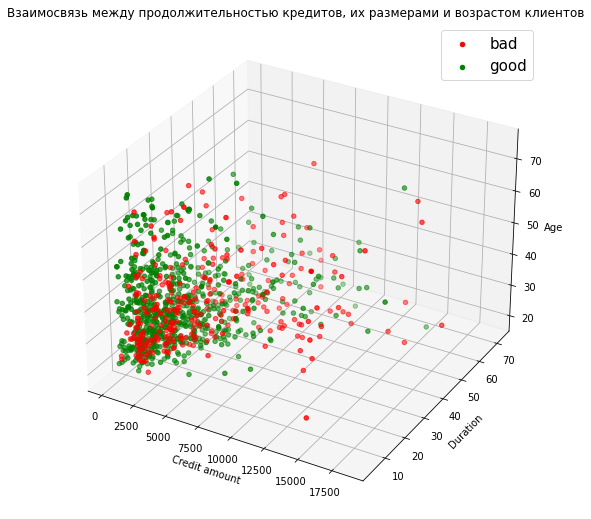

In [41]:
good = data[data['credit_risk'] == 'good']
bad = data[data['credit_risk'] == 'bad']

fig = plt.figure(figsize=(15,9))
ax = plt.axes(projection ='3d')
ax.scatter(bad['amount'], bad['duration'], bad['age'], color='r', label='bad')
ax.scatter(good['amount'],good['duration'], good['age'], color='g', label='good')

ax.set_zlabel('Age')
ax.set_ylabel('Duration')
ax.set_xlabel('Credit amount')
plt.legend(fontsize=15)

plt.title('Взаимосвязь между продолжительностью кредитов, их размерами и возрастом клиентов')

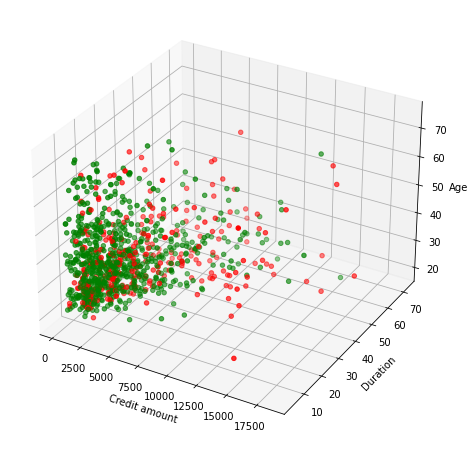

In [15]:
# your code here

### Задание 13  (0.5 балла)

Представьте все порядковые и бинарные признаки в виде числовых значений {0, ..., n - 1}, где n это количество значений признака. Избавьтесь от категориальных признаков.

In [293]:
d = {}
for i in data.columns.tolist():
    d[i] = data[i].unique()
d

{'status': array(['no checking account', '... < 0 DM',
        '... >= 200 DM / salary for at least 1 year', '0<= ... < 200 DM'],
       dtype=object),
 'duration': array([18,  9, 12, 10,  8,  6, 24, 11, 30, 48, 36, 15, 42, 21, 27, 33, 28,
         4, 47, 14, 39, 60,  5, 22, 54, 13, 16,  7, 20, 26, 45, 72, 40],
       dtype=int64),
 'credit_history': array(['all credits at this bank paid back duly',
        'no credits taken/all credits paid back duly',
        'existing credits paid back duly till now',
        'delay in paying off in the past',
        'critical account/other credits elsewhere'], dtype=object),
 'purpose': array(['car (used)', 'others', 'retraining', 'furniture/equipment',
        'car (new)', 'business', 'domestic appliances', 'radio/television',
        'repairs', 'vacation'], dtype=object),
 'amount': array([ 1049,  2799,   841,  2122,  2171,  2241,  3398,  1361,  1098,
         3758,  3905,  6187,  1957,  7582,  1936,  2647,  3939,  3213,
         2337,  7228,  3

In [7]:
#Представление всех порядковых и бинарных признаков в виде числовых значений
data['credit_risk'] = data['credit_risk'].replace(['bad', 'good'],[0,1])
data['foreign_worker'] = data['foreign_worker'].replace(['no', 'yes'],[0,1])
data['telephone'] = data['telephone'].replace(['no', 'yes (under customer name)'],[0,1])
data['status'] = data['status'].replace(['no checking account', '... < 0 DM', '0<= ... < 200 DM',
                                         '... >= 200 DM / salary for at least 1 year'], [0, 1, 2, 3])
data['savings'] = data['savings'].replace(['unknown/no savings account', '... <  100 DM', '100 <= ... <  500 DM',
                                           '500 <= ... < 1000 DM', '... >= 1000 DM'],[0, 1, 2, 3, 4])
data['employment_duration'] = data['employment_duration'].replace(['unemployed', '< 1 yr', '1 <= ... < 4 yrs', '4 <= ... < 7 yrs', '>= 7 yrs'],
                                    [0, 1, 2, 3, 4])
data['installment_rate'] = data['installment_rate'].replace(['< 20', '20 <= ... < 25', '25 <= ... < 35',  '>= 35'],
                                                           [0, 1, 2, 3])
data['present_residence'] = data['present_residence'].replace(['< 1 yr', '1 <= ... < 4 yrs', '4 <= ... < 7 yrs', '>= 7 yrs'],
                                                             [0, 1, 2, 3])
data['number_credits'] = data['number_credits'].replace(['1', '2-3', '4-5', '>= 6'], [0, 1, 2, 3])
data['people_liable'] = data['people_liable'].replace(['0 to 2', '3 or more'], [0, 1])

#Удаление категориальных признаков
data = data.drop(['credit_history','purpose', 'personal_status_sex', 'other_debtors', 'property', 'other_installment_plans',
           'housing', 'job'], axis=1)

In [8]:
data

,status,duration,amount,savings,employment_duration,installment_rate,present_residence,age,number_credits,people_liable,telephone,foreign_worker,credit_risk
0,0,18,1049,0,1,0,3,21,0,0,0,0,1
1,0,9,2799,0,2,2,1,36,1,1,0,0,1
2,1,12,841,1,3,2,3,23,0,0,0,0,1
3,0,12,2122,0,2,1,1,39,1,1,0,1,1
4,0,12,2171,0,2,0,3,38,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,24,1987,0,2,2,3,21,0,1,0,0,0
996,0,24,2303,0,4,0,0,45,0,0,0,0,0
997,3,21,12680,4,4,0,3,30,0,0,1,0,0
998,1,12,6468,4,0,2,0,52,0,0,1,0,0


### Задание 14  (2 балла)

По результатам предыдущего задания у вас должна получиться таблица, в которой все признаки так или иначе представлены числовыми значениями. Попробуйте придумать на основе проведённых исследований данных какую-нибудь формулу, связывающую целевую переменную с признаками, не используя готовых инструментов машинного обучения. По желанию вы можете исключить ещё какие-то признаки, или, наоборот, сформировать новые на основе имеющихся. Возможно, вы захотите отмасштабировать большие наборы численных значений некоторых признаков с помощью интервалов. Цель: реализовать функцию, которая будет принимать на вход набор признаков для объекта выборки и возвращать прогноз целевой переменной (0 или 1). Например, вы можете просто сложить все признаки и возращать ноль, если сумма отрицательная, а в противном случае единицу. Но наверняка можно придумать лучше!
Данные уже разделены на набор для обучения, который вы можете использовать как угодно, и тестовый, на котором нужно будет проверить вашу точность. Постарайтесь достичь точности хотя бы 0.6.

Формула, позволяющая определить надежность клиента на основе некоторых признаков.
При этом, приемлемые значения для каждого: 

* status >= 2
* savings >= 1
* employment_duration >= 1
* present_residence >= 0
* number_credits >= 0
* people_liable >= 0
* credit_risk = 1

Таким образом, если сумма вышеперечисленных показателей >= 4, клиент считается надежным, инече - нет.

In [10]:
data = data.drop(['installment_rate', 'duration', 'amount', 'age', 'telephone', 'foreign_worker'], axis=1)

In [25]:
data

,status,savings,employment_duration,present_residence,number_credits,people_liable,credit_risk
0,0,0,1,3,0,0,1
1,0,0,2,1,1,1,1
2,1,1,3,3,0,0,1
3,0,0,2,1,1,1,1
4,0,0,2,3,1,0,1
...,...,...,...,...,...,...,...
995,0,0,2,3,0,1,0
996,0,0,4,0,0,0,0
997,3,4,4,3,0,0,0
998,1,4,0,0,0,0,0


In [54]:
def predict(Xtest: np.array) -> np.array:
    X = Xtest.sum(axis=1)
    y = []
    for i in X:
        if i > 3:
            y_ = 1
        else:
            y_ = 0
        y.append(y_)
    y = np.array(y)
    return y.reshape(len(y), 1)

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = data.drop('credit_risk', 1).values
y = data['credit_risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)
# Используйте X_train и y_train на ваше усмотрение
# your code here
accuracy_score(y_test, predict(X_test))

C:\Users\halif\AppData\Local\Temp/ipykernel_18648/1252887092.py:15: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = data.drop('credit_risk', 1).values


0.644